In [1]:
import pandas as pd
import os
import time
from glob import glob
from collections import defaultdict, Counter
from tqdm import tqdm
from dateutil.parser import parse


In [2]:
# 类别固定清单
CATEGORIES = [
    '智能手机', '笔记本电脑', '平板电脑', '智能手表', '耳机', '音响', '相机', '摄像机', '游戏机',
    '上衣', '裤子', '裙子', '内衣', '鞋子', '帽子', '手套', '围巾', '外套',
    '零食', '饮料', '调味品', '米面', '水产', '肉类', '蛋奶', '水果', '蔬菜',
    '家具', '床上用品', '厨具', '卫浴用品',
    '文具', '办公用品',
    '健身器材', '户外装备',
    '玩具', '模型', '益智玩具',
    '婴儿用品', '儿童课外读物',
    '车载电子', '汽车装饰'
]


In [3]:
# 季节性、月度、周统计容器
month_counts = defaultdict(Counter)      # {month: {category: count}}
quarter_counts = defaultdict(Counter)    # {quarter: {category: count}}
weekday_counts = defaultdict(Counter)    # {weekday: {category: count}}

# 时序模式原始序列（按月合并后的聚合）
monthly_sequence = defaultdict(int)      # {(month, category): count}


In [ ]:
# 获取文件列表
files = glob("./30G_data_new_partial/*.parquet")
# files = glob("./*.parquet")
print(f"找到 {len(files)} 个文件: {files}")


找到 16 个文件: ['./30G_data_new_partial/part-00008.parquet', './30G_data_new_partial/part-00013.parquet', './30G_data_new_partial/part-00002.parquet', './30G_data_new_partial/part-00015.parquet', './30G_data_new_partial/part-00010.parquet', './30G_data_new_partial/part-00006.parquet', './30G_data_new_partial/part-00014.parquet', './30G_data_new_partial/part-00011.parquet', './30G_data_new_partial/part-00004.parquet', './30G_data_new_partial/part-00012.parquet', './30G_data_new_partial/part-00009.parquet', './30G_data_new_partial/part-00000.parquet', './30G_data_new_partial/part-00003.parquet', './30G_data_new_partial/part-00001.parquet', './30G_data_new_partial/part-00007.parquet', './30G_data_new_partial/part-00005.parquet']


In [5]:
# ========== 文件遍历 ==========
start_total = time.time()
for file in files:
    print(f"\n处理文件: {os.path.basename(file)}")
    t0 = time.time()
    df = pd.read_parquet(file)
    t1 = time.time()
    print(f"读取用时: {t1 - t0:.2f} 秒，共 {len(df)} 条记录")

    count = 0
    for _, row in tqdm(df.iterrows(), total=len(df)):
        try:
            date = parse(str(row['purchase_date']))
        except:
            continue

        month = date.month
        quarter = (month - 1) // 3 + 1
        weekday = date.weekday()

        cats = [c for c in row['categories'] if c in CATEGORIES]
        if not cats:
            continue

        for c in cats:
            month_counts[month][c] += 1
            quarter_counts[quarter][c] += 1
            weekday_counts[weekday][c] += 1
            monthly_sequence[(month, c)] += 1
        count += 1

    t2 = time.time()
    print(f"处理有效行数: {count}，分析用时: {t2 - t1:.2f} 秒")




处理文件: part-00008.parquet
读取用时: 4.91 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:11<00:00, 8179.41it/s]


处理有效行数: 8437500，分析用时: 1031.57 秒

处理文件: part-00013.parquet
读取用时: 6.07 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:46<00:00, 7911.01it/s]


处理有效行数: 8437500，分析用时: 1066.56 秒

处理文件: part-00002.parquet
读取用时: 5.71 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:35<00:00, 7993.18it/s]


处理有效行数: 8437500，分析用时: 1055.59 秒

处理文件: part-00015.parquet
读取用时: 5.15 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:25<00:00, 8067.38it/s]


处理有效行数: 8437500，分析用时: 1045.89 秒

处理文件: part-00010.parquet
读取用时: 5.49 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:39<00:00, 7967.37it/s]


处理有效行数: 8437500，分析用时: 1059.01 秒

处理文件: part-00006.parquet
读取用时: 5.28 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:58<00:00, 8287.01it/s]


处理有效行数: 8437500，分析用时: 1018.16 秒

处理文件: part-00014.parquet
读取用时: 5.43 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:57<00:00, 8290.23it/s]


处理有效行数: 8437500，分析用时: 1017.77 秒

处理文件: part-00011.parquet
读取用时: 5.45 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:54<00:00, 8317.23it/s]


处理有效行数: 8437500，分析用时: 1014.46 秒

处理文件: part-00004.parquet
读取用时: 6.08 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:47<00:00, 8370.86it/s]


处理有效行数: 8437500，分析用时: 1007.97 秒

处理文件: part-00012.parquet
读取用时: 5.35 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:45<00:00, 8393.88it/s]


处理有效行数: 8437500，分析用时: 1005.20 秒

处理文件: part-00009.parquet
读取用时: 5.00 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:42<00:00, 8419.61it/s]


处理有效行数: 8437500，分析用时: 1002.13 秒

处理文件: part-00000.parquet
读取用时: 5.35 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:47<00:00, 8378.33it/s]


处理有效行数: 8437500，分析用时: 1007.07 秒

处理文件: part-00003.parquet
读取用时: 5.24 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:03<00:00, 8243.90it/s]


处理有效行数: 8437500，分析用时: 1023.49 秒

处理文件: part-00001.parquet
读取用时: 5.36 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:00<00:00, 8265.57it/s]


处理有效行数: 8437500，分析用时: 1020.80 秒

处理文件: part-00007.parquet
读取用时: 5.05 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [16:46<00:00, 8381.33it/s]


处理有效行数: 8437500，分析用时: 1006.70 秒

处理文件: part-00005.parquet
读取用时: 4.84 秒，共 8437500 条记录


100%|██████████| 8437500/8437500 [17:11<00:00, 8180.39it/s]

处理有效行数: 8437500，分析用时: 1031.43 秒


In [6]:
print(f"月统计: {month_counts}")
print(f"季度统计: {quarter_counts}")
print(f"星期统计: {weekday_counts}")
print(f"时序模式原始序列: {monthly_sequence}")


月统计: defaultdict(<class 'collections.Counter'>, {5: Counter({'模型': 862453, '围巾': 857397, '文具': 855225, '卫浴用品': 837833, '水果': 835939, '智能手机': 826261, '饮料': 826138, '裙子': 817957, '零食': 814869, '耳机': 808276, '裤子': 805237, '游戏机': 804380, '益智玩具': 802548, '笔记本电脑': 800467, '健身器材': 799573, '智能手表': 795047, '内衣': 793138, '儿童课外读物': 790840, '外套': 788065, '婴儿用品': 782574, '车载电子': 780922, '肉类': 779212, '相机': 779094, '帽子': 778983, '家具': 777406, '平板电脑': 776803, '米面': 765788, '手套': 763473, '蔬菜': 762348, '蛋奶': 758127, '床上用品': 756452, '玩具': 755973, '户外装备': 753066, '汽车装饰': 750386, '厨具': 749770, '上衣': 747931, '办公用品': 743168, '水产': 739717, '调味品': 729235, '音响': 713583, '鞋子': 712485, '摄像机': 700538}), 1: Counter({'模型': 1034931, '围巾': 1031340, '文具': 1025302, '卫浴用品': 1006740, '水果': 1001840, '饮料': 994476, '智能手机': 989245, '裙子': 982753, '零食': 978976, '耳机': 970525, '裤子': 968011, '游戏机': 967928, '益智玩具': 961364, '笔记本电脑': 959817, '健身器材': 957726, '智能手表': 956505, '儿童课外读物': 951002, '内衣': 948901, '外套': 948375, '婴儿用品': 939508

In [7]:
end_total = time.time()
print(f"\n全部文件处理完成，耗时: {end_total - start_total:.2f} 秒")



全部文件处理完成，耗时: 16499.59 秒


In [8]:
# ===== 写出中间统计结果 =====
def save_nested_counter(counter_dict, filename, index_name, column_name):
    df = pd.DataFrame(counter_dict).fillna(0).astype(int).T
    df.index.name = index_name
    df.columns.name = column_name
    df.to_csv(filename, encoding='utf-8-sig')
    print(f"✅ 保存至: {filename}，shape: {df.shape}")


In [9]:
save_nested_counter(month_counts, "月度_商品购买频率.csv", "月份", "商品类别")
save_nested_counter(quarter_counts, "季度_商品购买频率.csv", "季度", "商品类别")
save_nested_counter(weekday_counts, "星期_商品购买频率.csv", "星期", "商品类别")


✅ 保存至: 月度_商品购买频率.csv，shape: (12, 42)
✅ 保存至: 季度_商品购买频率.csv，shape: (4, 42)
✅ 保存至: 星期_商品购买频率.csv，shape: (7, 42)


In [10]:
# ===== 时序模式处理 =====
# 按月份排序后的“全品类趋势序列”
df_seq = pd.DataFrame([
    {"月份": m, "商品类别": c, "购买次数": cnt}
    for (m, c), cnt in monthly_sequence.items()
])
df_seq = df_seq.sort_values(["商品类别", "月份"])
df_seq.to_csv("商品类别_月度序列.csv", index=False, encoding='utf-8-sig')
print(f"时序文件保存: 商品类别_月度序列.csv，共 {len(df_seq)} 行")


时序文件保存: 商品类别_月度序列.csv，共 504 行


In [11]:
from collections import defaultdict, Counter
from itertools import product
import pandas as pd

# 构建月份 → 类别统计
month_to_cat = defaultdict(Counter)
for (m, c), cnt in monthly_sequence.items():
    month_to_cat[m][c] += cnt

# 转移计数器
transition_counter = defaultdict(Counter)

# 1~11月 → 次月
for month in range(1, 12):
    curr_counter = month_to_cat[month]
    next_counter = month_to_cat[month + 1]
    
    for cat_from in curr_counter:
        for cat_to in next_counter:
            # 使用加权方式：from类出现次数 × to类出现次数
            transition_counter[cat_from][cat_to] += curr_counter[cat_from] * next_counter[cat_to]


# 12 → 1月
curr_counter = month_to_cat[12]
next_counter = month_to_cat[1]

for cat_from in curr_counter:
    for cat_to in next_counter:
        transition_counter[cat_from][cat_to] += curr_counter[cat_from] * next_counter[cat_to]

# 保存为DataFrame
df_trans = pd.DataFrame(transition_counter).fillna(0).astype(int)
df_trans.index.name = "当前月份类别"
df_trans.columns.name = "次月类别"
df_trans.to_csv("商品类别_月度转移矩阵.csv", encoding='utf-8-sig')

print("包含12→1的类别转移矩阵已保存：商品类别_月度转移矩阵.csv")


包含12→1的类别转移矩阵已保存：商品类别_月度转移矩阵.csv


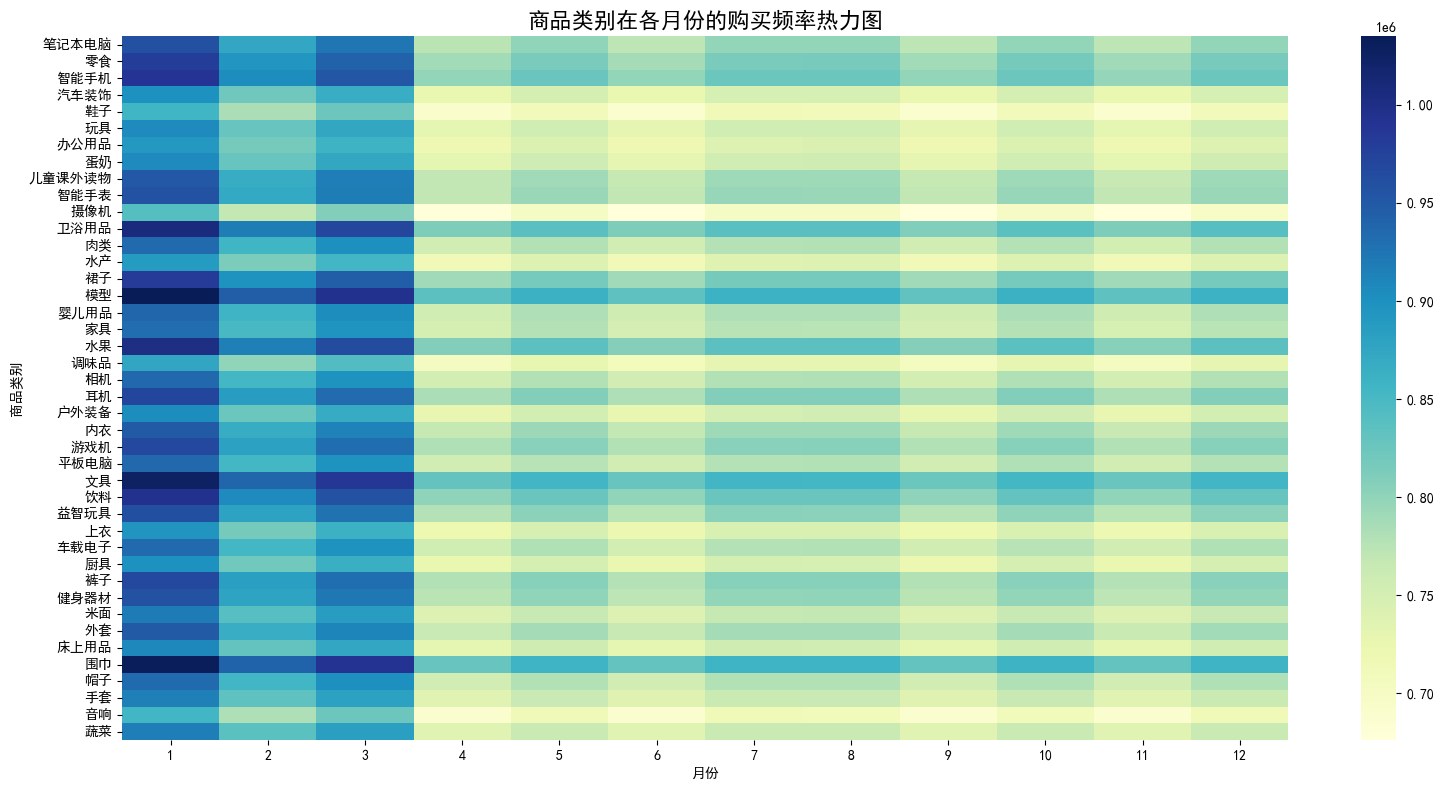

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体（防止中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 文件名可切换为你任意一个（如季度_商品购买频率.csv）
df = pd.read_csv("月度_商品购买频率.csv", index_col=0)

# 将索引（月份）转为整数，并排序
df.index = df.index.astype(int)
df = df.sort_index()

plt.figure(figsize=(16, 8))
sns.heatmap(df.T, cmap="YlGnBu", annot=False, fmt="d")
plt.title("商品类别在各月份的购买频率热力图", fontsize=16)
plt.xlabel("月份")
plt.ylabel("商品类别")
plt.tight_layout()
plt.show()


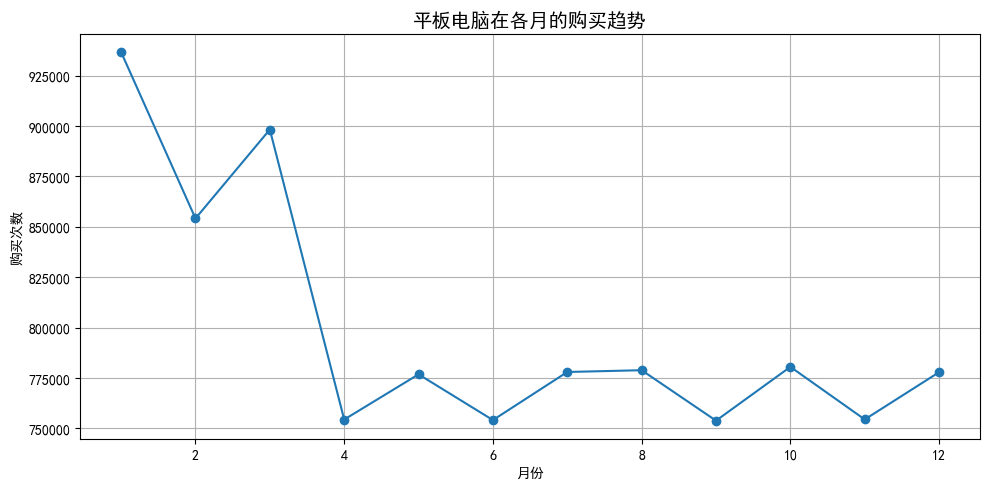

In [5]:
df = pd.read_csv("商品类别_月度序列.csv")

# 可替换为你关心的类别
category = "平板电脑"
df_cat = df[df["商品类别"] == category].sort_values("月份")

plt.figure(figsize=(10, 5))
plt.plot(df_cat["月份"], df_cat["购买次数"], marker="o")
plt.title(f"{category}在各月的购买趋势", fontsize=14)
plt.xlabel("月份")
plt.ylabel("购买次数")
plt.grid(True)
plt.tight_layout()
plt.show()


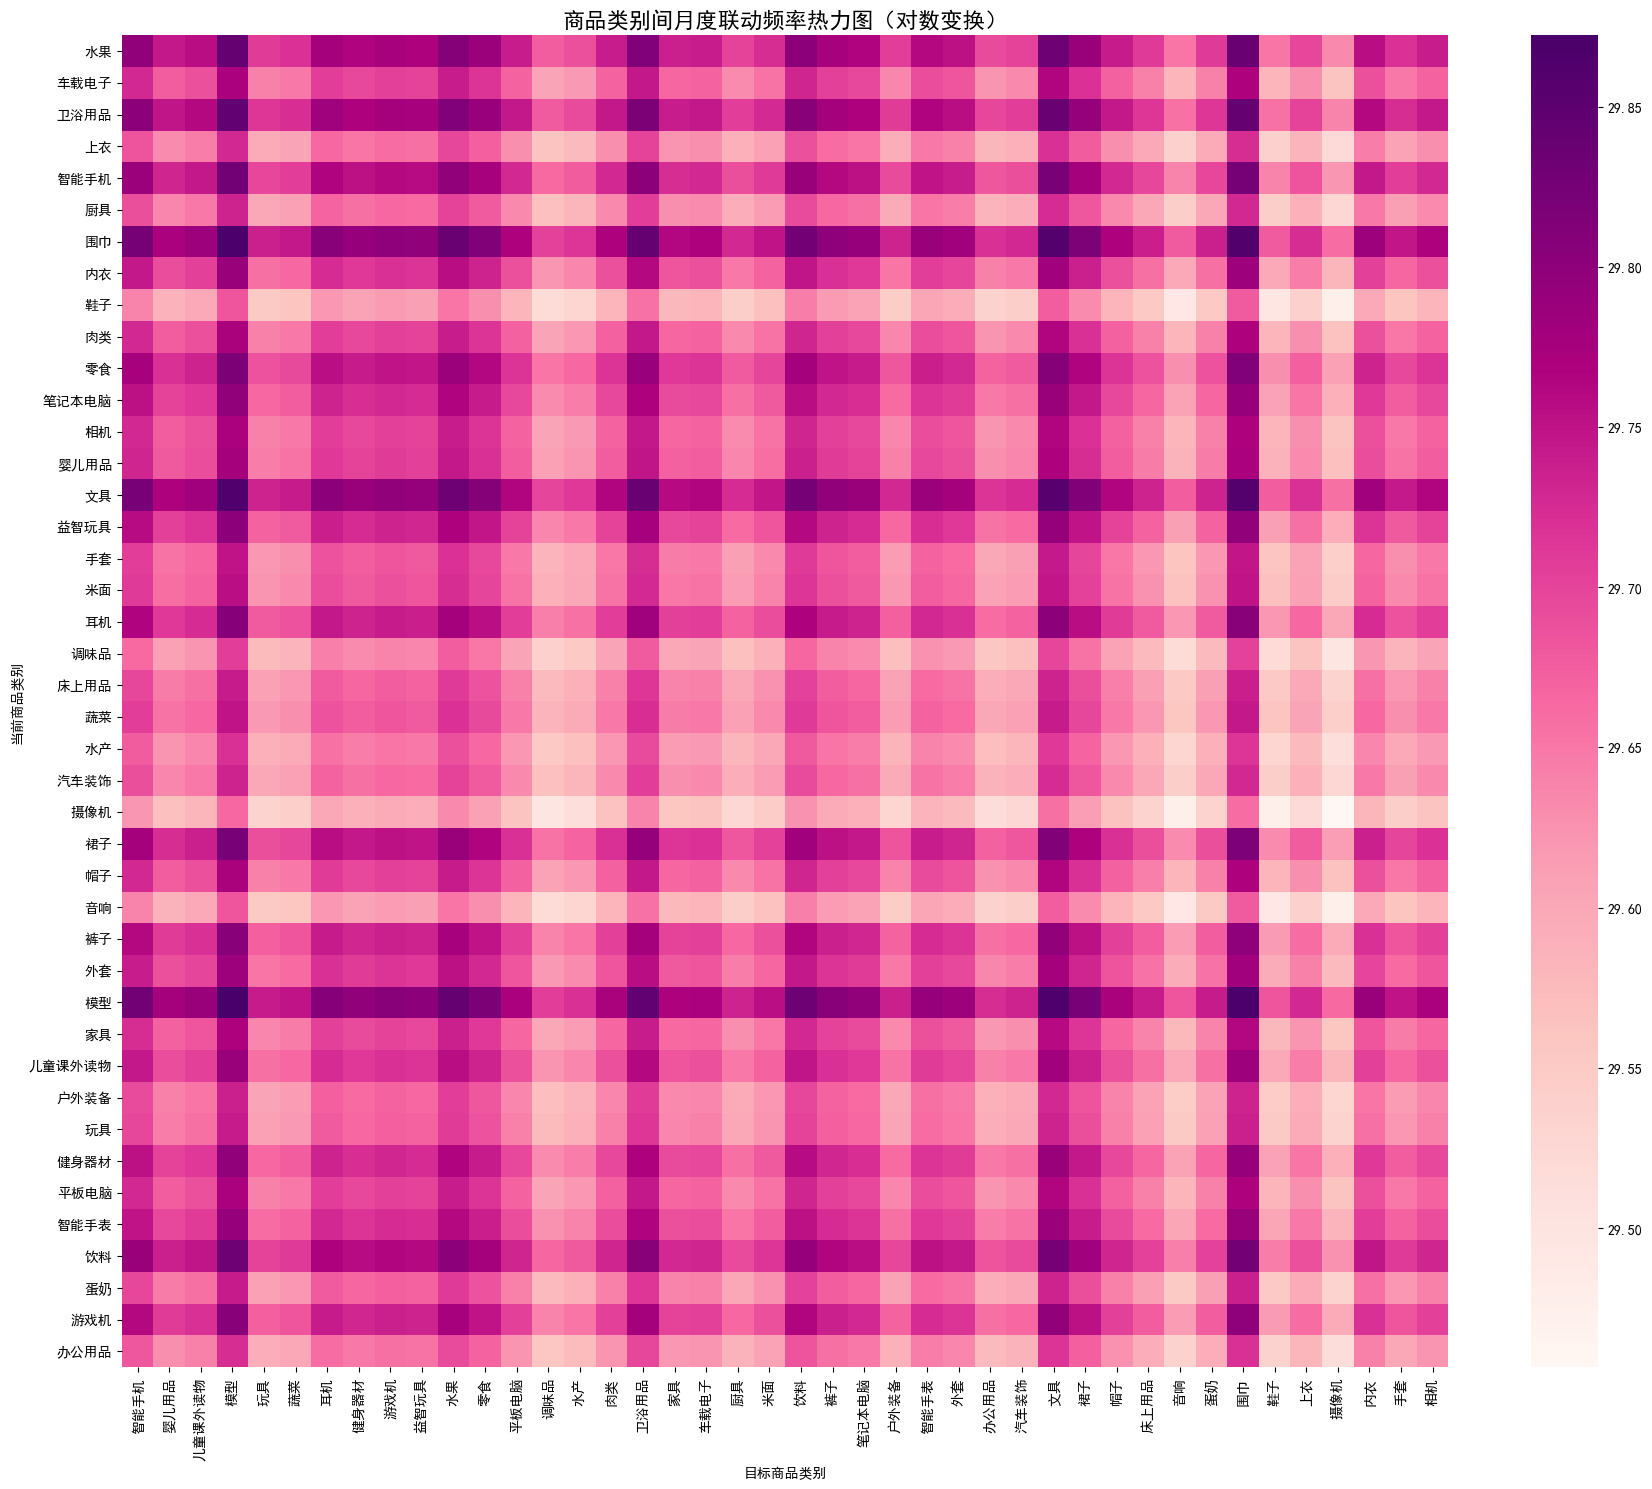

In [9]:
df = pd.read_csv("商品类别_月度转移矩阵.csv", index_col=0)

# 可选择对数变换增强可读性（原值太大）
import numpy as np
df_log = np.log1p(df)

plt.figure(figsize=(18, 15))
sns.heatmap(df_log, cmap="RdPu", xticklabels=True, yticklabels=True)
plt.title("商品类别间月度联动频率热力图（对数变换）", fontsize=16)
plt.xlabel("目标商品类别")
plt.ylabel("当前商品类别")
plt.tight_layout()
plt.show()
